In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
from matplotlib.pylab import plt
%matplotlib inline
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from scipy.spatial.distance import cdist, pdist
import statsmodels as sm
import scipy.stats
from mpl_toolkits.mplot3d import Axes3D



Populating the interactive namespace from numpy and matplotlib


## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)



In [3]:
print data1.shape

(100, 5)


In [4]:
dataN1 = data1
for i in data1.columns:
    dataN1[:][i]=(data1[:][i] - data1[:][i].mean())/data1[:][i].std()

In [5]:
dataN1.head()

,1,2,3,4,5
0,0.088841,-0.478402,-0.245260,-0.129274,-0.384419
1,-0.111724,-0.476457,-0.172939,-0.266815,-0.383469
2,-0.117958,-0.555402,-0.361058,-0.241905,-0.212936
3,-0.262019,-0.553895,-0.528312,-0.546628,-0.162948
4,-0.043157,-0.188838,-0.713700,0.155811,-0.418105


[ 0.90059112  0.08348612  0.00796721  0.00489886]


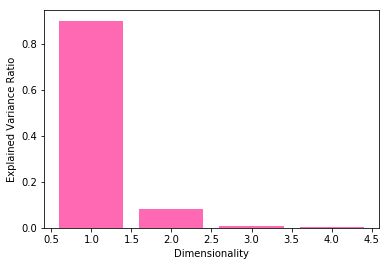

In [6]:
n=4 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(dataN1)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.bar(np.arange(n)+1, eigenvalues, color='Hotpink');
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

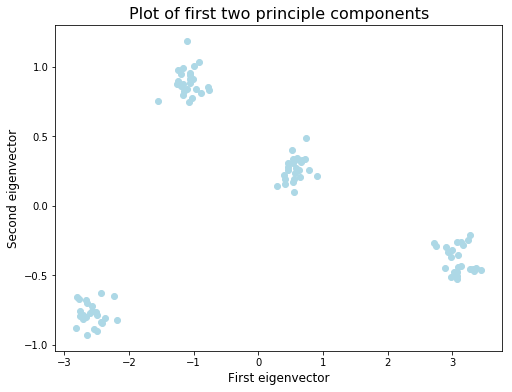

In [7]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(Xproj[:, 0], Xproj[:, 1], c='LightBlue')
plt.title("Plot of first two principle components", fontsize=16)
plt.xlabel('First eigenvector', fontsize=12)
plt.ylabel('Second eigenvector', fontsize=12)

plt.show()  

Visualizing the first two principle components on the data there appear to be four (4) clusters.

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)



In [8]:
n1=2 # number of clusters
dd=data1 #data
#tar=y # real target

#train the model.
km1=KMeans(random_state=324,n_clusters=n1)
res1=km1.fit(dd)
#result.
print(res1.labels_)
# print res.predict(dd)

n2=4 # number of clusters
dd=data1 #data
#tar=y # real target

#train the model.
km2=KMeans(random_state=324,n_clusters=n2)
res2=km2.fit(dd)
#result.
print(res2.labels_)
# print res.predict(dd)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


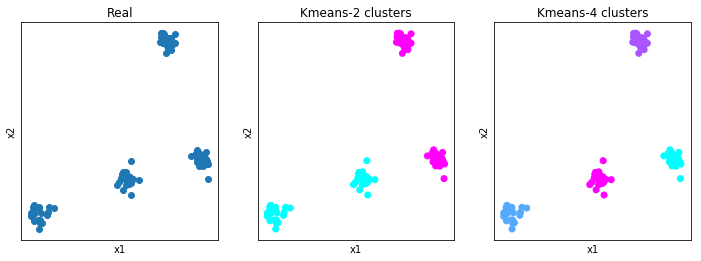

In [9]:
#Plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)

plt.scatter(dd[:]['1'], dd[:]['2'], cmap=plt.cm.cool) # c=tar,
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,3,2)
plt.scatter(dd[:]['1'], dd[:]['2'], c=res1.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n1))


plt.subplot(1,3,3)
plt.scatter(dd[:]['1'], dd[:]['2'], c=res2.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n2))
plt.show()

Above we see the observations plotted under three scenarios, all data in one (1) cluster, with two (2) k-means clusters, and our **selected four (4) k-means clusters**. Note the plots appears slightly differently to the original plot used to select the number of clusters as this is the original data, and the decision of number of clusters to use reviewed a plot of the principle components (PCA) of the data. Also, we're only plotting two of the given five (5) x-variables.

#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)



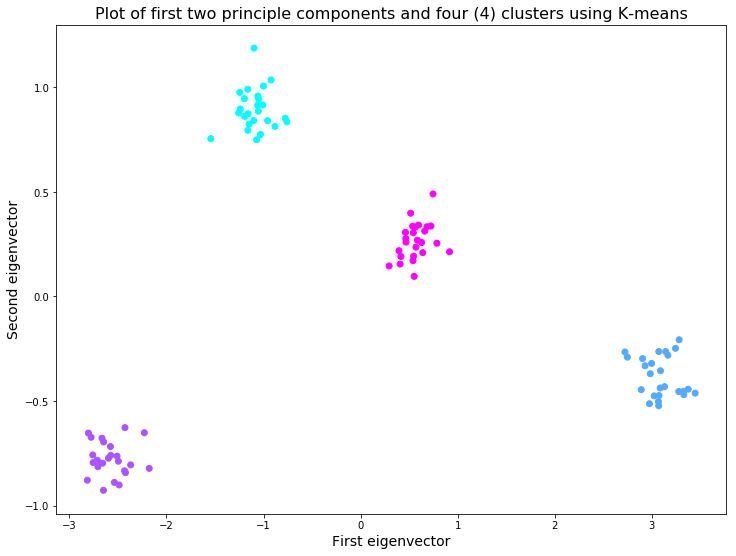

In [10]:
plt.figure(2, figsize=(12, 9))
plt.clf()

plt.scatter(Xproj[:, 0], Xproj[:, 1],  c=res2.labels_, cmap=plt.cm.cool)
plt.title("Plot of first two principle components and four (4) clusters using K-means", fontsize=16)
plt.xlabel('First eigenvector', fontsize=14)
plt.ylabel('Second eigenvector', fontsize=14)

plt.show() 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)


In [11]:

X=data1
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is :0.582399810661
For n_clusters = 3, the average silhouette_score is :0.691316729705
For n_clusters = 4, the average silhouette_score is :0.785088417732
For n_clusters = 5, the average silhouette_score is :0.657331065279
For n_clusters = 6, the average silhouette_score is :0.525210517531


From the above output, the **silhouette score is largest with n = 4**, so we choose **four (4) clusters**. Lets assess s for each observation for the different options for k.

In [12]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.", fontsize=14)
        ax1.set_xlabel("The silhouette coefficient values", fontsize=12)
        ax1.set_ylabel("Cluster label", fontsize=12)

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:]['1'], X[:]['2'], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.", fontsize=14)
        ax2.set_xlabel("Feature space for the 1st feature", fontsize=12)
        ax2.set_ylabel("Feature space for the 2nd feature", fontsize=12)

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=16, fontweight='bold')

        plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.58239981066074509)


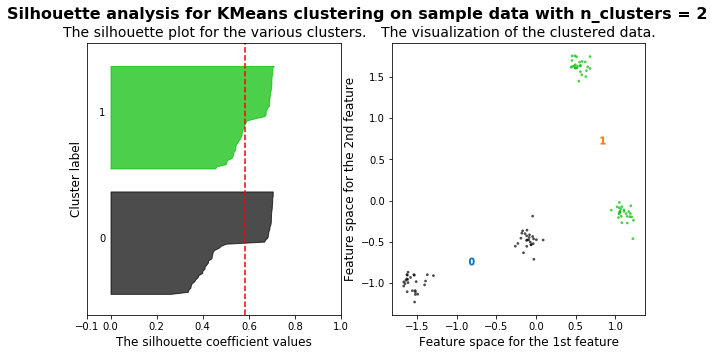

('For n_clusters =', 3, 'The average silhouette_score is :', 0.69131672970511171)


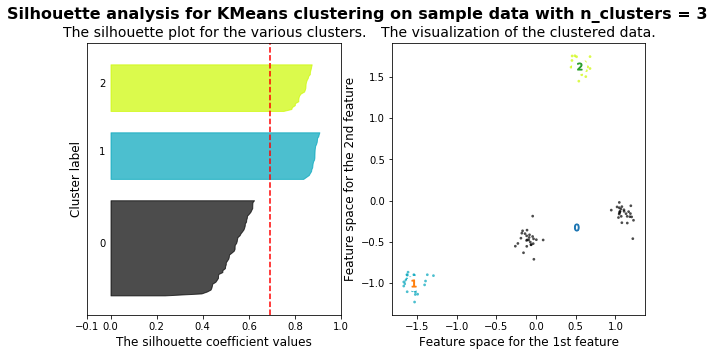

('For n_clusters =', 4, 'The average silhouette_score is :', 0.78508841773177485)


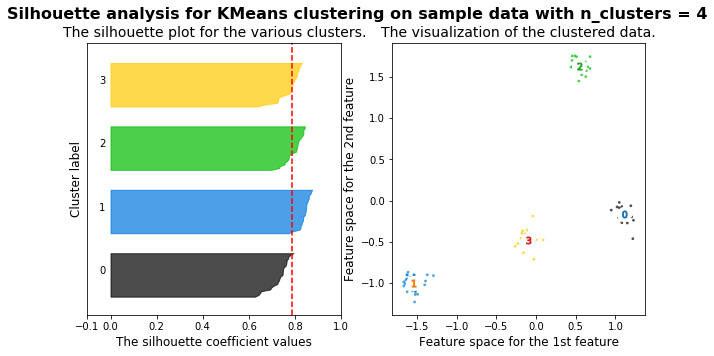

('For n_clusters =', 5, 'The average silhouette_score is :', 0.6573310652791936)


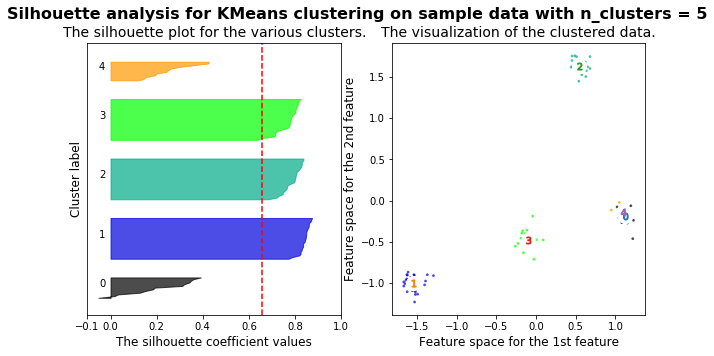

In [13]:
#plot
silhouette_score_plot(data1,range(2,6))

Again this analysis validates the use of k = 4 clusters. The average silhouette score crosses a proportion of the individual  observation silhouette scores in each of the four clusters. There do not appear to be any large kinks in the silhouette analysis for k = 4.

Reviewing the other results, there is a large kink in each of the clusters for k = 2. And for k = 3, the silhouette scores for observations in cluster 0 are all below the average silhouette score for all observations. For k = 5, the silhouette scores for points in clusters 0 and 4 are all much lower than the average silhouette score, and it looks like there are too many clusters in the visualization of clustered data. 

In [14]:


def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'm*-', linewidth=2, markersize=12)
    plt.grid(True)
    plt.xlabel('Number of clusters', fontsize=15)
    plt.ylabel('Average within-cluster sum of squares', fontsize=15)
    plt.title('Elbow for KMeans clustering', fontsize=16)
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'm*-', linewidth=2, markersize=12)
    plt.grid(True)
    plt.xlabel('Number of clusters', fontsize=15)
    plt.ylabel('Percentage of variance explained', fontsize=15)
    plt.title('Elbow for KMeans clustering', fontsize=16)
    plt.show()

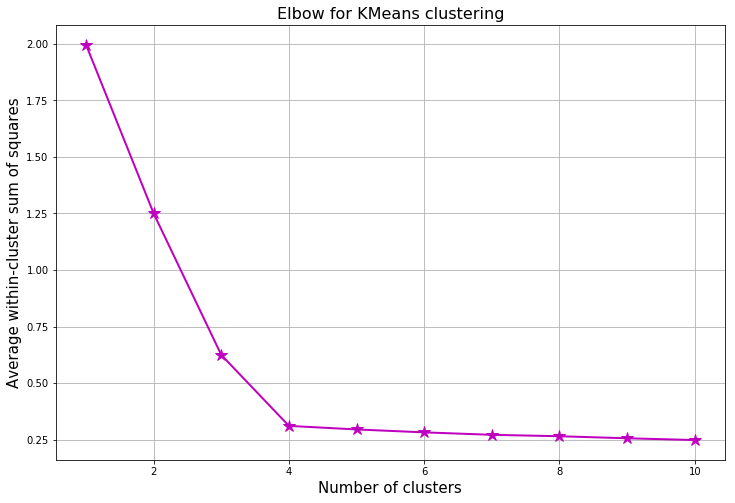

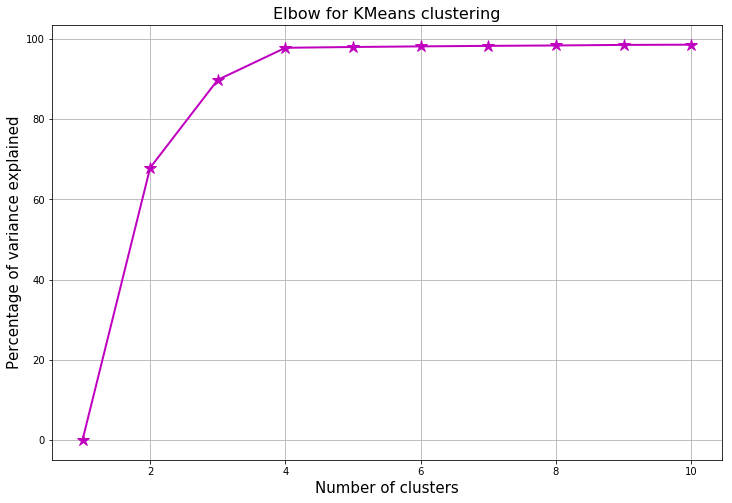

In [15]:
elbow(data1, range(1,11))

Using the elbow method for K-means, we observe the within cluster sum-of-squares decreases a lot until k = 4, at which point it plateaus and doesn't continue to reduce by much more. Similar for the percentage of variance explained. Approx 70% of variance is explained by adding a second cluster. This increases to around 90% with a third cluster, and then ~97% with a fourth cluster. Adding additional clusters after four (4) can only account for about ~3% of the variance - there is a 'clear elbow' in the data supporting the decision to use four (4) clusters.


#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

In [16]:
dd = data1

n1 = 2 # number of clusters - limited
# Gaussian Mixture:
GM1 = GaussianMixture(n_components=n1)
GM1.fit(dd.iloc[:,:-1])
res_Mix1 = GM1.predict(dd.iloc[:,:-1])


n2 = 4 # number of clusters - actual
# Gaussian Mixture:
GM2 = GaussianMixture(n_components=n2)
GM2.fit(dd.iloc[:,:-1])
res_Mix2 = GM2.predict(dd.iloc[:,:-1])



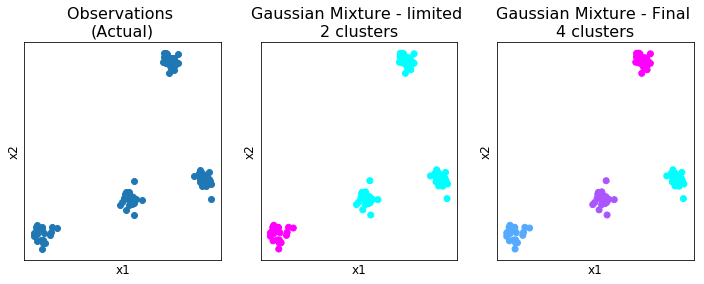

In [17]:
#Plot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)

plt.scatter(dd[:]['1'], dd[:]['2'], cmap=plt.cm.cool) # c=tar,
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.xticks(())
plt.yticks(())
plt.title("Observations \n(Actual)", fontsize=16)

plt.subplot(1,3,2)
plt.scatter(dd[:]['1'], dd[:]['2'], c=res_Mix1, cmap=plt.cm.cool)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.xticks(())
plt.yticks(())
plt.title("Gaussian Mixture - limited \n{} clusters".format(n1), fontsize=16)


plt.subplot(1,3,3)
plt.scatter(dd[:]['1'], dd[:]['2'], c=res_Mix2, cmap=plt.cm.cool)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.xticks(())
plt.yticks(())
plt.title("Gaussian Mixture - Final \n{} clusters".format(n2), fontsize=16)
plt.show()

Similar to our K-means models, we plot the actual observations with single cluster. Intermediate analysis with two (2) clusters, and actual result showing **four (4) clusters**. Note the intermediate step with Gaussian Mixture classifies different clusters to the K-means step, although with the full model (4 clusters), the clusters identified are the same. 

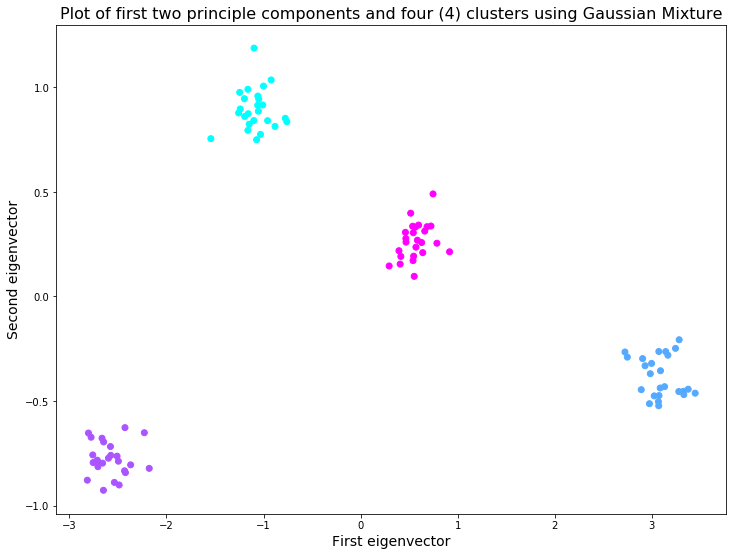

In [18]:
plt.figure(2, figsize=(12, 9))
plt.clf()

plt.scatter(Xproj[:, 0], Xproj[:, 1],  c=res2.labels_, cmap=plt.cm.cool)
plt.title("Plot of first two principle components and four (4) clusters using Gaussian Mixture", fontsize=16)
plt.xlabel('First eigenvector', fontsize=14)
plt.ylabel('Second eigenvector', fontsize=14)

plt.show() 

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [19]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.


In [20]:
data2.shape

(680, 29)

Total of 680 vehicle collision records, of which we know there are approximately 620 unique records.

In [21]:
data2Factor = data2

In [22]:
le = preprocessing.LabelEncoder()

In [23]:
columnHeaders = data2.columns

To start I factorised the data, and we know there are approximately 620 unique records


In [24]:
for i in columnHeaders:
    columnData = data2[:][i]
    dedupedColumnData = columnData.drop_duplicates()
    le.fit(dedupedColumnData)
    factoredColumnData = le.transform(columnData)
    data2Factor[[i]] = factoredColumnData  

In [25]:
data2Factor.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,136,292,209,293,216,0,0,...,15,0,0,0,575,12,14,0,0,0
1,0,0,0,136,355,351,356,0,0,0,...,15,0,0,0,409,14,13,0,0,0
2,0,0,3,27,383,94,384,286,71,0,...,0,0,0,0,330,11,0,0,0,0
3,0,0,2,69,543,542,0,209,230,0,...,15,0,0,0,31,11,7,0,0,0
4,0,0,3,23,463,238,465,0,0,49,...,15,3,0,0,36,14,13,2,0,0


Let's calculate the silhouette score for a number of clusters ranging between 613 and 620. 

When the silhouette score doesn't change, this indicates observations aren't being reassigned to new clusters, even though number of clusters is increasing. 

This implies all records are either in their own cluster, or the duplicate records share their cluster with their duplicate.

In [26]:
X=data2Factor
range_n_clusters = [613, 614, 615, 616, 617, 618, 619, 620]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(round(silhouette_avg,6)))

For n_clusters = 613, the average silhouette_score is : 0.194237
For n_clusters = 614, the average silhouette_score is : 0.192821
For n_clusters = 615, the average silhouette_score is : 0.190386
For n_clusters = 616, the average silhouette_score is : 0.187966
For n_clusters = 617, the average silhouette_score is : 0.185294
For n_clusters = 618, the average silhouette_score is : 0.185294
For n_clusters = 619, the average silhouette_score is : 0.185294
For n_clusters = 620, the average silhouette_score is : 0.185294


The silhouette score output indicated there are 617 clusters, because the silhouette score doesn't change even when we continue to increase the number of clusters. The number of clusters is the number of unique observations, i.e. 617.

Science ehhh.. unsupervised learning - like it!



#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [27]:
data2Deduped = data2.drop_duplicates()
recordsCount = data2Deduped.shape[0]
print("Confirming the number of unique records is: {}".format(recordsCount) + " using the 'drop_duplicates' function in Pandas")

Confirming the number of unique records is: 617 using the 'drop_duplicates' function in Pandas


## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* **a) it is a square matrix - TRUE**
* b) it is symmetrical - FALSE
* c) it has dimensions $3\times3$ - FALSE (unless you include totals, which assume we are not)
* **d) it reports the size of each class in the test set - TRUE, this can be obtained by totalling relevant entries (e.g. number of 1's class should be TP (those truly classified as positive) + FN (those falsely classified as negative))**
* e) it reports the total size of the training set - FALSE
* **f) it reports the number of observations the classifier assigned to each class - TRUE for the test set (if considering all observations (i.e. both training and test data), the answer would be false)**
* **g) it reports the proportion of correct predictions across the test set - TRUE**

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [28]:
data4 = pd.read_csv('hw4data4.csv')
data4.shape

(200, 4)

In [29]:
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


In [30]:
n = data4.shape[0]/2
n

100

In [31]:
# split sample into training and test ones
n = data4.shape[0]/2

train, test = data4[:n], data4[n:]
train.shape, test.shape

((100, 4), (100, 4))

In [32]:
#set colormap
pylab.rcParams['image.cmap'] = 'RdYlGn'

#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)



In [48]:
#learn logistic regression over the training sample
logit = LogisticRegression(C=1e4)
# C is an inverse regularization constant. More detail when we consider Bayesian inference, 
# for now lets just mention that higher C mean no regularization
logit.fit(train[['x1','x2','x3']],train[['y']])


LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)



In [34]:
print("The intercept is: {} " .format(round(logit.intercept_[0],4)) 
      + "\nParameter for 'x1' is : {} ".format(round(logit.coef_[0][0],4)) 
      + "\nParameter for 'x2' is : {} ".format(round(logit.coef_[0][1],4)) 
      + "\nParameter for 'x3' is : {} ".format(round(logit.coef_[0][2],4)))

The intercept is: -1.2654 
Parameter for 'x1' is : -27.4478 
Parameter for 'x2' is : -73.6116 
Parameter for 'x3' is : -22.6289 


#### c) Use your trained model to predict labels for the test data. (3 pts)



In [35]:
labelPred = logit.predict(test[['x1','x2','x3']])
labelPred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)


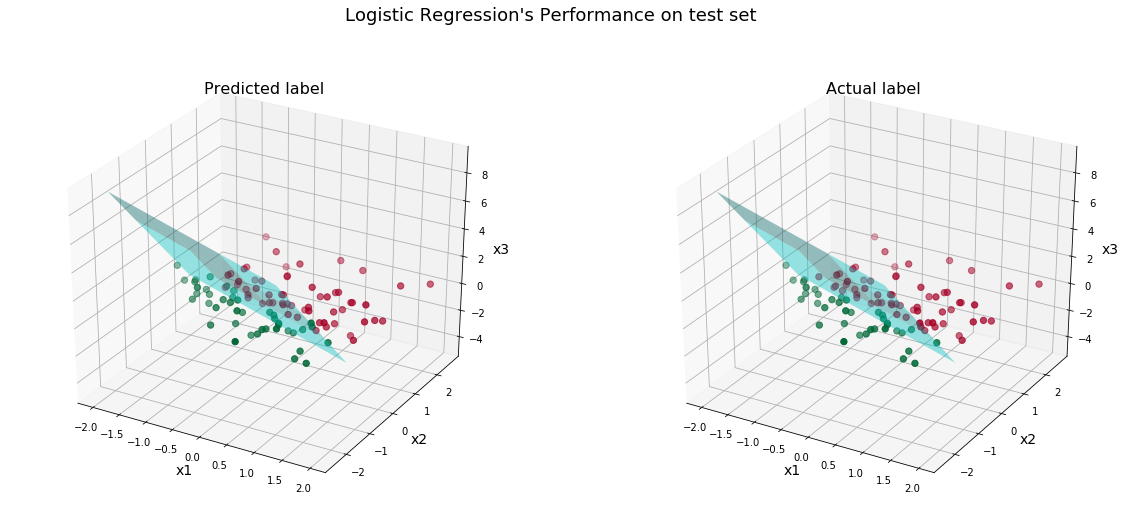

In [36]:
#apply to the validation sample
labelPred = logit.predict(test[['x1','x2','x3']])
labelActual = test[['y']]

fig2 = plt.figure(figsize = (20,8))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121, projection='3d'), fig2.add_subplot(122, projection='3d')

# Generate coordinates for hyperplane
radius = 2
xplot1, xplot2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_x3 = -(logit.intercept_[0] + logit.coef_[0][0]*xplot1 + logit.coef_[0][1]*xplot2)/logit.coef_[0][2]


ax1.scatter(test[['x1']], test[['x2']], test[['x3']], c=labelPred.tolist(), s=40)
ax1.plot_surface(xplot1, xplot2, fit_x3, color='c', alpha = 0.4)
ax1.set_title("Predicted label", fontsize=16)
ax1.set_xlabel("x1", fontsize=14)
ax1.set_ylabel("x2", fontsize=14)
ax1.set_zlabel("x3", fontsize=14)
ax1.view_init(azim = -60)   # Controls the viewing angle


ax2.scatter(test[['x1']], test[['x2']], test[['x3']], c=labelActual['y'], s=40)
ax2.plot_surface(xplot1, xplot2, fit_x3, color='c', alpha = 0.4)
ax2.set_title("Actual label", fontsize=16)
ax2.set_xlabel("x1", fontsize=14)
ax2.set_ylabel("x2", fontsize=14)
ax2.set_zlabel("x3", fontsize=14)
ax2.view_init(azim = -60)   # Controls the viewing angle

plt.show()




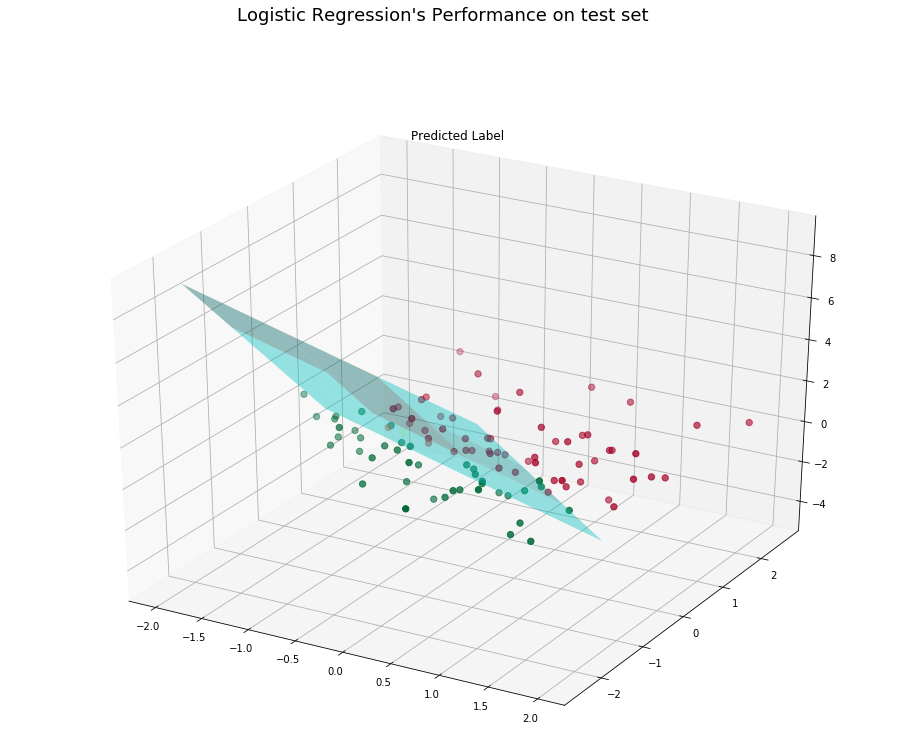

In [37]:

logitProbability = logit.predict_proba(test[['x1','x2','x3']])[:,1]
#logitProbability[0:10]

#visualize the prediction label probabilities 
fig2 = plt.figure(figsize = (16,12))
ax = fig2.gca(projection='3d')
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
#ax1 = fig2.add_subplot(121, projection='3d')

#decision boundary
ax.plot_surface(xplot1, xplot2, fit_x3, color='c', alpha = 0.4)

ax.set(title='Predicted Label')
ax.scatter(test[['x1']], test[['x2']], test[['x3']], c = logitProbability, s=40)
plt.show()



#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [38]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual['y']==1))
FP = sum((labelPred==1)&(labelActual['y']==0))
FN = sum((labelPred==0)&(labelActual['y']==1))
TN = sum((labelPred==0)&(labelActual['y']==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 88.10%
Accuracy = 95.00%
Recall = 100.00%


In [39]:
print(confusion_matrix(labelPred, labelActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[58  0]
 [ 5 37]]

TP = 37, TN = 58, FP = 5, FN = 0


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)



In [40]:
# import a classic dataset on flower species
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame(np.concatenate((Y.reshape(len(Y),1),X),axis=1))
data_i.columns=["Species","Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Species,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)


In [41]:
logreg = LogisticRegression(C=1e6)
logreg.fit(X, Y)


LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)


In [42]:
labelPredict = logreg.predict(X)
labelPredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)


In [43]:
#compute T00, T11, T22, F01, F02, F10, F12, F20, F21 for the above classification 
#Note: T11 indicates model correctly classified a 1 value
#F01 indicates model incorrectly classified a 0 as a 1
#F10 indicates model incorrectly classified a 1 as a 0 (order matters!)
T00 = sum((labelPredict==0)&(Y==0))
T11 = sum((labelPredict==1)&(Y==1))
T22 = sum((labelPredict==2)&(Y==2))

F01 = sum((labelPredict==1)&(Y==0))
F02 = sum((labelPredict==2)&(Y==0))

F10 = sum((labelPredict==0)&(Y==1))
F12 = sum((labelPredict==2)&(Y==1))

F20 = sum((labelPredict==0)&(Y==2))
F21 = sum((labelPredict==1)&(Y==2))


In [44]:
print(confusion_matrix(Y, labelPredict))
print('\nT00 = %d, T11 = %d, T22 = %d, F01 = %d, F02 = %d, F10 = %d, F12 = %d, F20 = %d, F21 = %d'%(T00,T11,T22,F01,F02,F10,F12,F20,F21))


[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]

T00 = 50, T11 = 48, T22 = 49, F01 = 0, F02 = 0, F10 = 0, F12 = 2, F20 = 0, F21 = 1



#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy


In [45]:
#compute precision of classification of class 0 and accuracy of overall model
Acc = 100.0 * (T00 + T11 + T22)/(T00 + T11 + T22 + F01 + F02 + F10 + F12 + F20 + F21)
Prec= 100.0 * T00/(T00 + F01 + F02)
print('Precision of classfication of class 0 = %.2f%%\nOverall model accuracy = %.2f%%'%(Prec,Acc))

Precision of classfication of class 0 = 100.00%
Overall model accuracy = 98.00%


    
#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification. (4 pts)


[ 0.92264045  0.04810411  0.01829962  0.00700086]


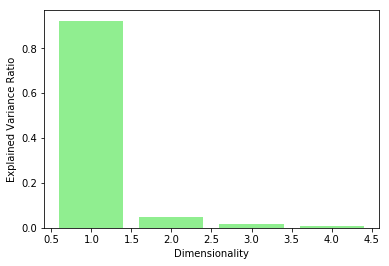

In [46]:
n=4 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(data_i)
eigenvalues = pca.explained_variance_ratio_
print pca.explained_variance_ratio_
plt.bar(np.arange(n)+1, eigenvalues, color='LightGreen');
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

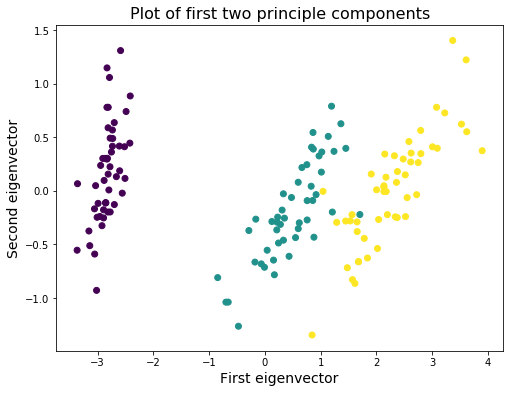

In [47]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(Xproj[:, 0], Xproj[:, 1], c=labelPredict, cmap='viridis')
plt.title("Plot of first two principle components", fontsize=16)
plt.xlabel('First eigenvector', fontsize=14)
plt.ylabel('Second eigenvector', fontsize=14)


plt.show()  